Note: All code in script is sourced from various internet sources, from mentor Tomasz Popiel and from Alan Chalk at Sabre Insurance.

## HDBSCAN

Contents:

-  Start_: import modules, set directories, load data   
('03_distancematrix_20%_exclude_target_weight511.hkl')   
('03_distancematrix_20%_exclude_target_weight151.hkl')   
('03_distancematrix_20%_exclude_target_weight115.hkl')   
 
-  Experiment weights  
    - (5,1,1) 
    - (1,5,1)
    - (1,1,5)

-  HDBSCAN 
 
-  Target varaibles analysis

-  t-SNE Visualisation

Notes: Three distance matrix used is 20% of data with different weights

### Start_:

Import modules

In [1]:
import os
import hickle as hkl
import gc

import pandas as pd
import numpy as np

from scipy.spatial.distance import squareform

import collections, numpy

import hdbscan 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from tabulate import tabulate

/Users/hujuiting/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/hujuiting/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Set directories

In [2]:
print(os.getcwd())

dirRawData = "../RawData/"
dirPData = "../PData/"
dirPOutput = "../POutput/"

/Users/hujuiting/Desktop/GROUP PROJECT/PCode


Load data

In [3]:
#fname = dirPData + '03_distancematrix_20%_exclude_target_weight511.hkl'
fname = dirPData + '03_distancematrix_20%_exclude_target_weight151.hkl'
#fname = dirPData + '03_distancematrix_20%_exclude_target_weight115.hkl'

with open(fname, 'r') as f:
    dict_ = hkl.load(f)


# %% Load data

D_3 = dict_['D_3']
df_all_2 = dict_['df_all_2'] # 20% of non scaled data 
df_all = dict_['df_all'] # 20% of scaled data

del fname

In [4]:
D_3_square = squareform(D_3)
del D_3
gc.collect()

131

### Experiment weights 

#### (5,1,1)
It did not much better than before, so it would not be discussed.

In [5]:
# sizes1 = [80,90]
# sizes2 =  (100 + 40 * np.arange(10)).tolist()
# sizes = sizes1+sizes2

# samples = 1

# for i in sizes:
    
#     clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size = i, min_samples = samples)
#     clusterer.fit(D_3_square)
    
#     # count number of data points in each cluster 
#     clustersize = collections.Counter(clusterer.labels_)  
#     outliers = clustersize[-1]
    
    
#     print("min_cluster_size : ", i, 'min_samples : ', samples , "outliers : ", outliers, "max_labels : ", max(clustersize))

min_cluster_size :  80 min_samples :  1 outliers :  6850 max_labels :  1
min_cluster_size :  90 min_samples :  1 outliers :  6850 max_labels :  1
min_cluster_size :  100 min_samples :  1 outliers :  6850 max_labels :  1
min_cluster_size :  140 min_samples :  1 outliers :  6850 max_labels :  1
min_cluster_size :  180 min_samples :  1 outliers :  6850 max_labels :  1
min_cluster_size :  220 min_samples :  1 outliers :  6850 max_labels :  1
min_cluster_size :  260 min_samples :  1 outliers :  6850 max_labels :  1
min_cluster_size :  300 min_samples :  1 outliers :  6850 max_labels :  1
min_cluster_size :  340 min_samples :  1 outliers :  6850 max_labels :  1
min_cluster_size :  380 min_samples :  1 outliers :  6850 max_labels :  1
min_cluster_size :  420 min_samples :  1 outliers :  6850 max_labels :  1
min_cluster_size :  460 min_samples :  1 outliers :  6850 max_labels :  1


#### (1,5,1)

In [5]:
sizes1 = [40,50,60,70,80,90]
sizes2 =  (100 + 40 * np.arange(10)).tolist()
sizes = sizes1+sizes2

samples = 1

for i in sizes:
    
    clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size = i, min_samples = samples)
    clusterer.fit(D_3_square)
    
    # count number of data points in each cluster 
    clustersize = collections.Counter(clusterer.labels_)  
    outliers = clustersize[-1]
    
    
    print("min_cluster_size : ", i, 'min_samples : ', samples , "outliers : ", outliers, "max_labels : ", max(clustersize))

min_cluster_size :  40 min_samples :  1 outliers :  1524 max_labels :  42
min_cluster_size :  50 min_samples :  1 outliers :  957 max_labels :  37
min_cluster_size :  60 min_samples :  1 outliers :  955 max_labels :  33
min_cluster_size :  70 min_samples :  1 outliers :  832 max_labels :  31
min_cluster_size :  80 min_samples :  1 outliers :  891 max_labels :  25
min_cluster_size :  90 min_samples :  1 outliers :  632 max_labels :  22
min_cluster_size :  100 min_samples :  1 outliers :  722 max_labels :  21
min_cluster_size :  140 min_samples :  1 outliers :  459 max_labels :  17
min_cluster_size :  180 min_samples :  1 outliers :  459 max_labels :  17
min_cluster_size :  220 min_samples :  1 outliers :  659 max_labels :  16
min_cluster_size :  260 min_samples :  1 outliers :  411 max_labels :  15
min_cluster_size :  300 min_samples :  1 outliers :  674 max_labels :  14
min_cluster_size :  340 min_samples :  1 outliers :  877 max_labels :  12
min_cluster_size :  380 min_samples :  1 ou

#### (1,1,5)
It did not much better than before, so it would not be discussed.

In [5]:
# sizes1 = [40,50,60,70,80,90]
# sizes2 =  (100 + 40 * np.arange(10)).tolist()
# sizes = sizes1+sizes2

# samples = 1

# for i in sizes:
    
#     clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size = i, min_samples = samples, alpha = 0.5)
#     clusterer.fit(D_3_square)
    
#     # count number of data points in each cluster 
#     clustersize = collections.Counter(clusterer.labels_)  
#     outliers = clustersize[-1]
    
    
#     print("min_cluster_size : ", i, 'min_samples : ', samples , "outliers : ", outliers, "max_labels : ", max(clustersize))

min_cluster_size :  40 min_samples :  1 outliers :  5435 max_labels :  2
min_cluster_size :  50 min_samples :  1 outliers :  5435 max_labels :  2
min_cluster_size :  60 min_samples :  1 outliers :  5435 max_labels :  2
min_cluster_size :  70 min_samples :  1 outliers :  5435 max_labels :  2
min_cluster_size :  80 min_samples :  1 outliers :  5435 max_labels :  2
min_cluster_size :  90 min_samples :  1 outliers :  4629 max_labels :  1
min_cluster_size :  100 min_samples :  1 outliers :  4629 max_labels :  1
min_cluster_size :  140 min_samples :  1 outliers :  4629 max_labels :  1
min_cluster_size :  180 min_samples :  1 outliers :  4629 max_labels :  1
min_cluster_size :  220 min_samples :  1 outliers :  4629 max_labels :  1
min_cluster_size :  260 min_samples :  1 outliers :  4629 max_labels :  1
min_cluster_size :  300 min_samples :  1 outliers :  4629 max_labels :  1
min_cluster_size :  340 min_samples :  1 outliers :  4629 max_labels :  1
min_cluster_size :  380 min_samples :  1 out

### HDBSCAN 

Distance matrix : Exclude target variables and add wight (1,5,1) 

In [5]:
cluster = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=260, min_samples = 1, gen_min_span_tree=True)
cluster.fit(D_3_square)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=260, min_samples=1, p=None,
        prediction_data=False)

count number of data points in each cluster

In [6]:
clustersize = collections.Counter(cluster.labels_)  
clustersize

Counter({14: 1102,
         8: 427,
         -1: 411,
         6: 428,
         15: 1290,
         9: 1039,
         12: 1170,
         11: 826,
         2: 1008,
         4: 762,
         3: 1000,
         7: 1216,
         1: 916,
         10: 305,
         0: 263,
         13: 560,
         5: 316})

#### clusterer outlier score
A higher score inferrs more outlier objects.

In [7]:
cluster.outlier_scores_.mean()

0.18857972008224225

#### clusterer probability score
A score of 0.0 represents a sample that is not in the cluster at all (all noise points will get this score)
while a score of 1.0 represents a sample that is at the heart of the cluster

In [8]:
all(cluster.probabilities_)

False

### Target varaibles analysis

Make dataframe 'info' of each data entry ID, tq_v3, target varaibles, cluster label

In [9]:
clustering_labels = pd.DataFrame(cluster.labels_, columns=['cluster'])

In [10]:
#using df_all_2 because this is the non-scaled dataset
datainfo = pd.DataFrame(df_all_2[['id','tq_v3','tq_dt1_mean','tq_dt2_mean','tq_dt3_mean','tq_dt4_mean','tq_dt1_std','tq_dt2_std','tq_dt3_std','tq_dt4_std']])

In [11]:
clustering_labels.reset_index(drop=True, inplace=True)
datainfo.reset_index(drop=True, inplace=True)

In [12]:
info = pd.concat([datainfo,clustering_labels], axis = 1)

In [13]:
info.head()

,id,tq_v3,tq_dt1_mean,tq_dt2_mean,tq_dt3_mean,tq_dt4_mean,tq_dt1_std,tq_dt2_std,tq_dt3_std,tq_dt4_std,cluster
0,12468,16,0.0984,0.0328,0.0,0.0164,0.3514,0.1796,0.0,0.128,14
1,32442,4,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,8
2,26216,3,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,-1
3,50550,1,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,6
4,45726,2,0.1250,0.0000,0.0,0.0000,0.3536,0.0000,0.0,0.000,8


To get summary statistics of the target varaibles for each cluster

In [14]:
# Summary statistics of target varaibles for cluster 0
info[info.cluster == 0].describe()

,id,tq_v3,tq_dt1_mean,tq_dt2_mean,tq_dt3_mean,tq_dt4_mean,tq_dt1_std,tq_dt2_std,tq_dt3_std,tq_dt4_std,cluster
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.0
mean,32637.996198,70.281369,0.098640,0.078470,0.007497,0.015271,0.296522,0.255060,0.058231,0.087416,0.0
std,18844.355947,180.206658,0.077311,0.083485,0.014835,0.029926,0.158298,0.153864,0.073842,0.091727,0.0
min,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16408.500000,4.000000,0.045500,0.027250,0.000000,0.000000,0.235600,0.205750,0.000000,0.000000,0.0
50%,32982.000000,17.000000,0.095900,0.070200,0.000000,0.006700,0.315500,0.279000,0.000000,0.081600,0.0
75%,49169.500000,69.000000,0.134500,0.105300,0.008900,0.019050,0.386350,0.350450,0.097800,0.139400,0.0
max,65268.000000,2387.000000,0.500000,0.666700,0.100000,0.250000,0.825400,0.822800,0.365100,0.500000,0.0


Plotting the target varaible values for each cluster on box plots (one plot for each of the 8 target varaibles) to assess the distribution of the target variables in each cluster.

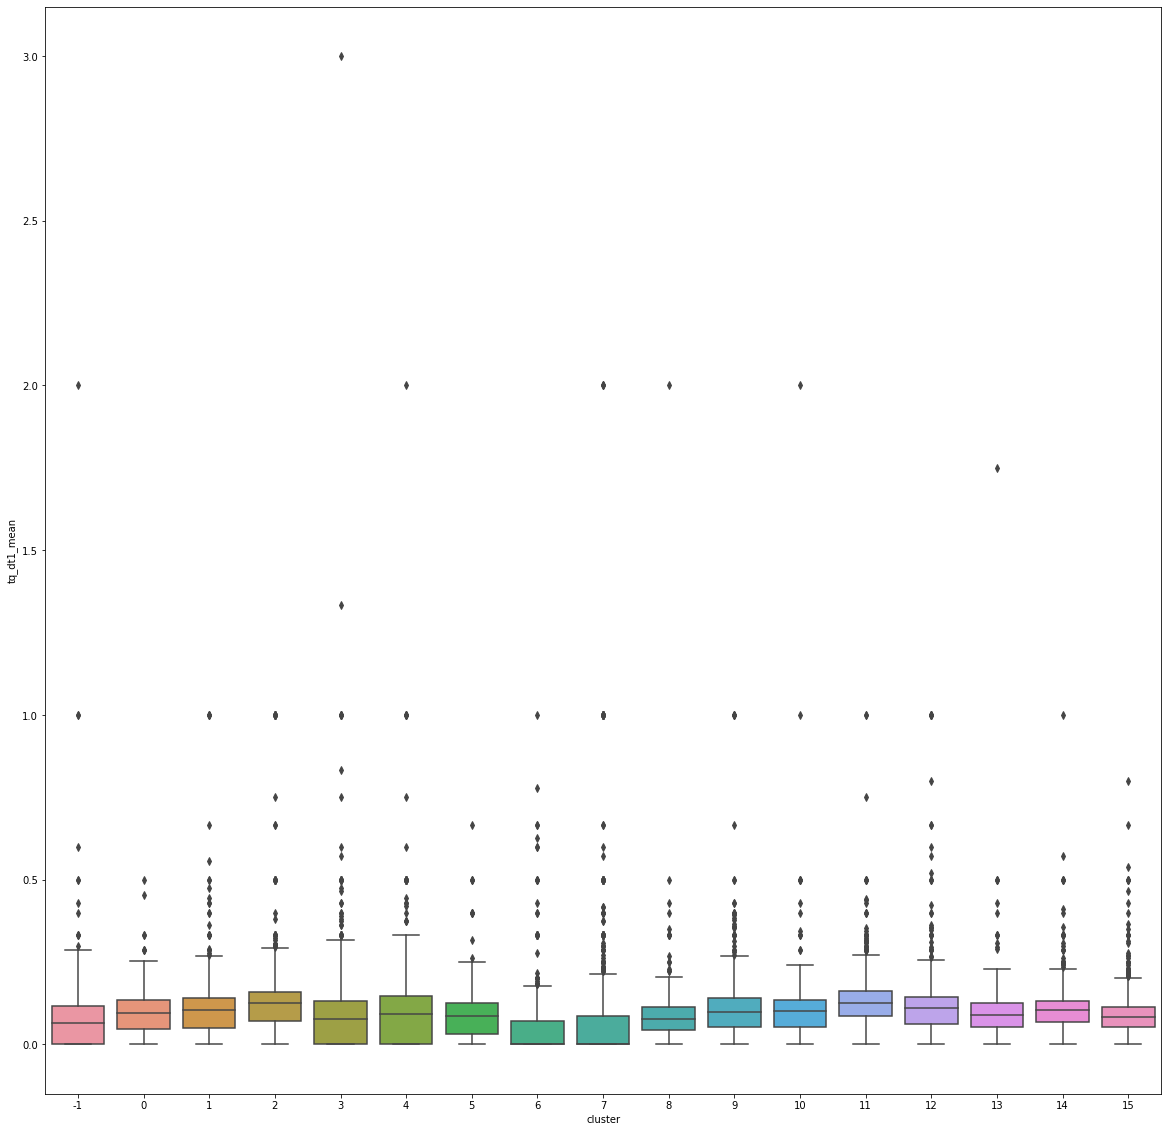

In [15]:
plt.figure(figsize=(20,20))
sns.boxplot(x='cluster', y= 'tq_dt1_mean', data = info) # Specity target varaible to plot

To list which data entries (by id) belong to cluster 0 (for example)

In [16]:
cluster0 = info[info.cluster == 0] 
print(cluster0.shape)
print(cluster0.id)

(263, 11)
61       19151
62       64478
66       31649
85       12966
133      32917
293      16300
296      57827
415      62489
423       7429
521       7884
563      25883
572      33141
630      53015
648      20233
668      23958
859      22563
936       2519
980      47836
1016     52019
1078     33497
1234     59305
1237     36019
1538     12876
1596     38785
1617     37657
1618     40278
1640     45400
1777     61158
1793     51946
1875     61357
         ...  
11314     5883
11318    32070
11340    47804
11379    37573
11391    24086
11435    24806
11663    38130
11679     3738
11699    52283
11878    11877
11939    28530
11962    21439
12020    55403
12126    17002
12152     9974
12190    36467
12263    10708
12268    38977
12327     6096
12381    59254
12413    25104
12437    20328
12497    42281
12673     6817
12716    56933
12792    42875
12850    55823
12973    20075
13008    42047
13013    14425
Name: id, Length: 263, dtype: int64


### t-SNE visualization 

Plot the clusters with t-SNE to visualise the clusters

In [17]:
from sklearn.manifold import TSNE
D_square_TSNE = TSNE(n_components=2, metric = 'precomputed', random_state = 123).fit_transform(D_3_square) #use two componenets, so can be plotted in 2D

# Select the 0th feature: xs
x = D_square_TSNE[:,0]
# Select the 1st feature: ys
y = D_square_TSNE[:,1]

Visualising the dataset

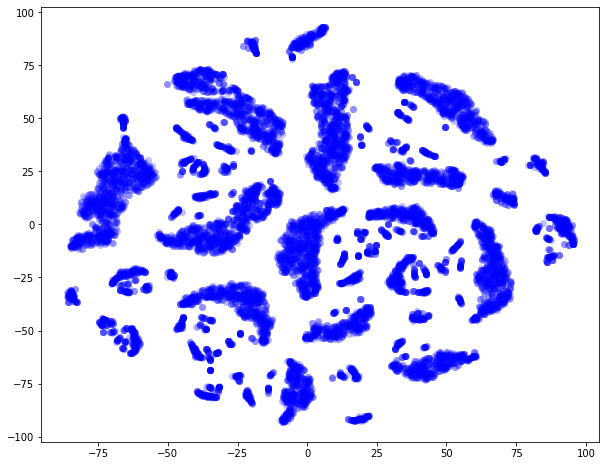

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=50, linewidth=0, c='b', alpha=0.25)

Visualising the clusters

In [19]:
D_square_TSNE =  pd.DataFrame(D_square_TSNE, columns=['D_square_TSNE_x','D_square_TSNE_y'])

In [20]:
D_square_TSNE = pd.concat([D_square_TSNE,clustering_labels], axis = 1)

In [21]:
D_square_TSNE.head()

,D_square_TSNE_x,D_square_TSNE_y,cluster
0,-33.416145,-9.279416,14
1,40.480175,2.224641,8
2,30.060017,39.242149,-1
3,5.797726,-52.527775,6
4,40.677364,-1.040678,8


In [22]:
#set font size of labels on matplotlib plots
plt.rc('font', size=20)

# set colour pallet
custom = ['#1b9e77','#bebada','#fdcdac',"#de77ae", "#377eb8", "#95a5a6", "#e74c3c", "#34495e", "#b2df8a","#ffeda0","#feb24c","#c994c7",'#dd1c77','#9ecae1','#fdae61','#d95f0e','#d8b365']
sns.set_palette(custom)
#sns.palplot(sns.color_palette())

/Users/hujuiting/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


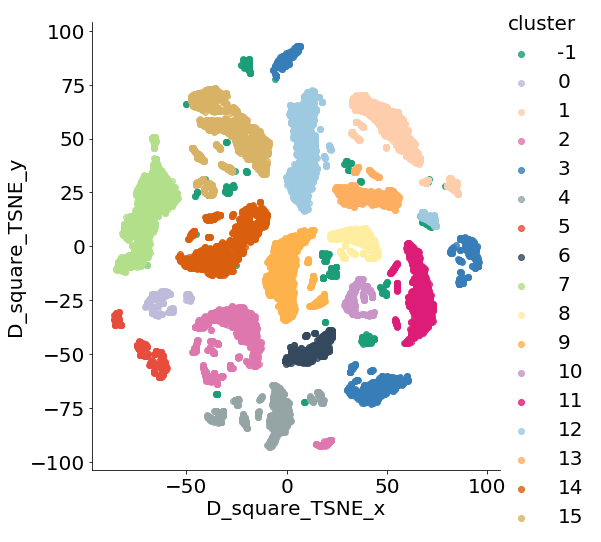

In [23]:
sns.lmplot(data=D_square_TSNE, x='D_square_TSNE_x', y='D_square_TSNE_y', hue='cluster', size =7.5, fit_reg=False, legend=True, legend_out=True
          )  

Plot the hierarchy of the clusters produced by HDBSCAN

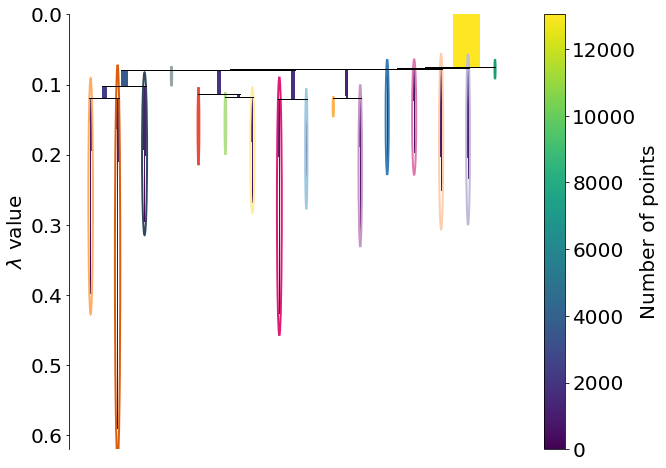

In [24]:
plt.figure(figsize=(10,8))
cluster.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette(custom))

Visualise the outliers produced by HDBSCAN

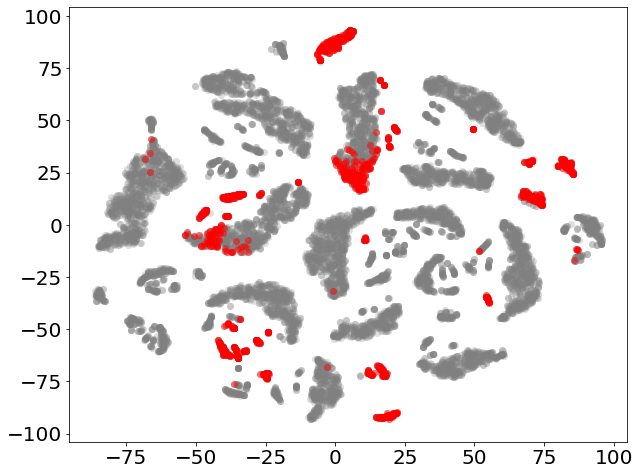

In [25]:
plt.figure(figsize=(10, 8))
threshold = pd.Series(cluster.outlier_scores_).quantile(0.9)
outliers = np.where(cluster.outlier_scores_ > threshold)[0]
plt.scatter(x,y, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(x[outliers],y[outliers], s=50, linewidth=0, c='red', alpha=0.5)